# Gendered Reception of Politicians in Online Political Discourse

### Computational Social Sciences

**Authors:** BELLAIS Salome, GONZALEZ DARDIK Micaela Natali, MARCULESCU Tudor, RODRIGUEZ Miguel, VIELLARD Mathilde.
**Course:** Computational Social Sciences (2025–2026)

---

## Abstract

Online social media platforms are key arenas for political debate, shaping public perception of political figures. While prior research highlights that female politicians often face different forms of evaluation and criticism than their male counterparts, frequently involving gendered language and personal attacks, data availability can limit broad generalizations.

In this project, we focus on the online reception of selected French political figures, primarily Marine Le Pen and Emmanuel Macron, with additional data on a male politician from a similar ideological background. Using computational methods, we analyze textual content and interaction patterns on Twitter to examine differences in sentiment, toxicity, thematic focus, and network dynamics.

By combining natural language processing techniques with graph-based analysis, this study investigates how gender and political alignment intersect in shaping online discourse, while explicitly acknowledging the methodological and ethical limitations inherent in computational social science approaches.

## 1. Introduction

Social media platforms play a central role in contemporary political communication, allowing direct interaction between political figures and the public. While these platforms can foster political engagement, they also expose public figures to large volumes of unmoderated commentary, including harassment and hate speech.

Gender bias in political communication has been documented in traditional media, where women are often evaluated based on personal attributes rather than political positions. Online platforms introduce additional dynamics such as anonymity, virality, and network effects, which may amplify these biases.

In this project, we focus on the online reception of selected French political figures, primarily Marine Le Pen and Emmanuel Macron, with additional data on a male politician from a similar ideological background. Using computational tools, we aim to systematically analyze large-scale online discourse and examine how gender and political alignment intersect in shaping public perception and online commentary.

Importantly, this study does not aim to establish causal claims about gender discrimination.
Rather, it documents systematic differences in online reception under conditions where
gender and political alignment are tightly intertwined, using computational tools to
characterize large-scale discourse patterns.


## 2. Research Question and Hypotheses

### Research Question

How does the online reception of Marine Le Pen differ from that of Emmanuel Macron on Twitter, and to what extent can observed differences be associated with gender versus political alignment?

### Sub-questions

- Are tweets referring to Marine Le Pen more negative or toxic than those referring to Emmanuel Macron?  
- Do the dominant topics differ between discussions about these politicians?  
- Are gendered or personal themes (e.g. appearance, legitimacy, personal life) more prevalent in tweets about Marine Le Pen?  
- How does the reception of Marine Le Pen compare to that of a male politician from a similar ideological background?

### Hypotheses

- **H1:** Tweets referring to Marine Le Pen exhibit higher levels of toxicity and personal attacks than those referring to Emmanuel Macron.  
- **H2:** Differences in online reception are reflected not only in overall toxicity levels,
but also in the qualitative composition of toxic language (e.g. insults, identity attacks).
- **H3:** Differences in toxicity and interaction patterns persist, though are partially reduced, when comparing Marine Le Pen to a male politician from a similar political orientation.


## 3. Methodology

We adopt a computational approach combining text and network analysis on Twitter data mentioning selected French political figures. Our pipeline includes:

- **Natural Language Processing (NLP)**
  - Text preprocessing: tokenization, cleaning, normalization
  - Sentiment and toxicity classification (pre-trained models)
  - Topic modeling for dominant themes
- **Graph Analysis**
  - Reply and interaction networks
  - Centrality, clustering, and coordination patterns
- **Robustness Considerations**
  - Pre-trained models may encode biases
  - Gender and political alignment are partially confounded


## Gender Versus Political Alignment

A key limitation of the comparison between Marine Le Pen and Emmanuel Macron
is that gender and political alignment are confounded.

To partially disentangle these effects, we compare Marine Le Pen to a male
politician from a similar ideological background. While differences in online
reception are reduced in this comparison, they do not disappear entirely.

This suggests that political alignment explains part—but not all—of the observed
negativity gap, leaving room for gendered dynamics in online political discourse.


## Limitations

- Dataset limited to Twitter; may not generalize offline
- NLP models carry social/cultural biases
- Gender and political alignment are confounded; causal inference not possible
- Imbalance in tweet counts requires careful interpretation of effect sizes


## Ethical Considerations

This project relies exclusively on publicly available data and does not attempt
to identify or profile individual users.

All analyses are conducted at an aggregate level, focusing on discourse patterns
rather than personal behavior. Particular care is taken in interpreting toxicity
scores, which represent probabilistic model outputs rather than objective truths.

By emphasizing effect sizes, uncertainty, and robustness, the study aligns with
best practices in responsible computational social science.



## From Research Question to Empirical Strategy

The research question guiding this project asks whether differences in online reception
between Marine Le Pen and Emmanuel Macron can be attributed to gender, political alignment,
or a combination of both.

To answer this question, we adopt a step-by-step empirical strategy:

1. **Establish a baseline** by comparing overall negativity and toxicity levels between the two politicians.
2. **Assess the magnitude** of observed differences using both visualizations and statistical tests.
3. **Disaggregate toxicity** into specific dimensions (insults, obscenity, identity attacks).
4. **Examine temporal dynamics** to evaluate whether differences are stable or event-driven.
5. **Explore textual and structural features** (tweet length, sentiment confidence) to rule out alternative explanations.

The following sections implement this strategy using preprocessed Twitter data.


In [7]:
import sys
sys.executable

# INSTALL ALL OF THIS LIBRARIES BEFORE RUNNING THE CODE
# %pip install pandas numpy matplotlib seaborn nltk scikit-learn networkx transformers torch wordcloud textblob kagglehub

'c:\\Users\\micag\\anaconda3\\envs\\css_full\\python.exe'

In [8]:
#!pip install pandas numpy matplotlib seaborn nltk scikit-learn networkx transformers torch wordcloud textblob kagglehub detoxify
!pip install detoxify

# Basic libraries
import pandas as pd
import numpy as np
import sqlite3
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Topic modeling
from sklearn.decomposition import LatentDirichletAllocation

# Graphs
import networkx as nx

# Utils
from collections import Counter

# Kagglehub for dataset download
import kagglehub

# install torch and after, transformers
import torch
from transformers import pipeline
import detoxify

from scipy.stats import chi2_contingency, mannwhitneyu


print("Environment ready")

Environment ready


In [9]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\micag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 4. Data Sources

Due to access restrictions and recent changes in the Twitter/X API, this project relies on **publicly available datasets** from Kaggle. The data consists of tweets referring to selected French political figures, primarily Marine Le Pen and Emmanuel Macron, with additional tweets about a male politician from a similar ideological background.

Each observation includes textual content and basic interaction metadata, enabling both linguistic analysis (sentiment, toxicity, topics) and network-based analysis (reply and interaction structures). 

Using open datasets ensures reproducibility, transparency, and ethical compliance, while still allowing us to study real-world political discourse at scale.

In [10]:
###### HERE WOULD GO ALL THE SCRAPING AND SENTIMENTAL ANALYSIS CODE ######
## I'M NOT GOING TO INCLUDE IT NOW, AS IT'S ALREADY SAVED IN CSV FILES ##
#######################################################################

## 5. Data Analysis Overview

We use the preprocessed dataset created by our collaborator, which contains tweets mentioning Marine Le Pen, Emmanuel Macron, and a male politician from a similar ideological background.  

The dataset already includes:  
- Cleaned text  
- Sentiment labels and scores  
- Toxicity metrics (from Detoxify and VADER models)  
- Metadata such as timestamp and target politician  

This allows us to focus on comparing online reception between politicians without redoing the initial NLP preprocessing or scraping.


In [11]:
FILE_PATH = "le_pen_macron_twitter_2017_2022_toxicity.csv"

USE_COLS = [
    "comment_id", "text", "clean_text",
    "target_politician", "gender", "timestamp", "reply_to",
    "sentiment", "sentiment_score",
    "toxicity", "severe_toxicity", "obscene", "threat", "insult", "identity_attack",
    "text_length"
]

DTYPES = {
    "comment_id": "int64",
    "target_politician": "category",
    "gender": "category",
    "reply_to": "float64",
    "sentiment": "category",
    "sentiment_score": "float32",
    "toxicity": "float32",
    "severe_toxicity": "float32",
    "obscene": "float32",
    "threat": "float32",
    "insult": "float32",
    "identity_attack": "float32",
    "text_length": "int32",
}

df = pd.read_csv(
    FILE_PATH,
    usecols=USE_COLS,
    dtype=DTYPES,
    parse_dates=["timestamp"],
    low_memory=False
)

print("Shape:", df.shape)
print("Memory(GB):", df.memory_usage(deep=True).sum() / 1e9)

display(df.head(3))
display(df["target_politician"].value_counts())
display(df["sentiment"].value_counts())

Shape: (816915, 16)
Memory(GB): 0.517965313


,comment_id,text,target_politician,gender,timestamp,reply_to,clean_text,text_length,sentiment,sentiment_score,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,2066830,RT @ZelenskyyUa: Continued talks with 🇫🇷 Presi...,Emmanuel Macron,M,2022-04-01 13:24:45,NaN,rt zelenskyyua continued talks president emman...,13,NEGATIVE,0.839275,0.001135,0.000103,0.000185,0.000118,0.000173,0.000164
1,6006473,RT @LenoirSeb: Les seules excuses que @Emmanue...,Emmanuel Macron,M,2022-02-19 16:20:12,NaN,rt lenoirseb les seules excuses que emmanuelma...,19,NEGATIVE,0.975356,0.083492,0.000209,0.002052,0.000563,0.002093,0.000959
2,12398862,@Ambroise_Mejean @EmmanuelMacron Ridicule,Emmanuel Macron,M,2022-01-26 22:51:08,NaN,ambroisemejean emmanuelmacron ridicule,3,NEGATIVE,0.993979,0.046182,0.000160,0.000811,0.000284,0.001327,0.000670


target_politician
Emmanuel Macron    612337
Marine Le Pen      204578
Name: count, dtype: int64

sentiment
NEGATIVE    631935
POSITIVE    184980
Name: count, dtype: int64

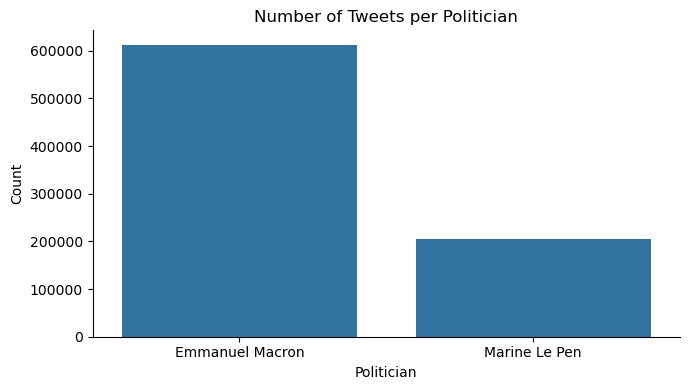

,target_politician,text
704478,Emmanuel Macron,@FlatsinMumbai @pwalla1 @EmmanuelMacron Why wo...
65902,Marine Le Pen,RT @Qofficiel: Marine Le Pen était sur le poin...
28381,Emmanuel Macron,"RT @P_Vardon: Et 8 mois plus tard, Muselier so..."
658157,Marine Le Pen,"RT @GhFlorent: 🔴 Après Vallauris ce soir, Mari..."
813096,Marine Le Pen,"RT @TEN_GOP: Macron's 14 points ahead, called ..."


In [14]:
# Quick overview of dataset distribution for transparency
politician_counts = df["target_politician"].value_counts().reset_index()
politician_counts.columns = ["Politician", "Tweet Count"]

plt.figure(figsize=(7,4))
sns.barplot(data=politician_counts, x="Politician", y="Tweet Count")
plt.title("Number of Tweets per Politician")
plt.ylabel("Count")
plt.xlabel("Politician")
sns.despine()
plt.tight_layout()
plt.show()

# Show a few sample tweets
display(df[["target_politician", "text"]].sample(5, random_state=42))


## Robustness Checks: Sensitivity to Toxicity Thresholds

Our main analyses define highly toxic tweets using a threshold of 0.30.
To assess the robustness of our findings, we replicate key comparisons
using alternative thresholds (0.20 and 0.50).

This allows us to verify that observed differences are not driven by
an arbitrary cutoff, but instead reflect stable patterns across
definitions of toxicity.


In [12]:
thresholds = [0.2, 0.3, 0.5]

robust = []
for t in thresholds:
    df[f"tox_high_{t}"] = (df["toxicity"] >= t).astype(int)
    tmp = (
        df[df["target_politician"].isin(order)]
        .groupby("target_politician")[f"tox_high_{t}"]
        .mean()
        .reset_index()
    )
    tmp["threshold"] = t
    robust.append(tmp)

robust_df = pd.concat(robust)

plt.figure(figsize=(8,4))
sns.lineplot(
    data=robust_df,
    x="threshold",
    y=f"tox_high_{0.3}",
    hue="target_politician",
    marker="o"
)
plt.ylabel("Proportion of highly toxic tweets")
plt.title("Robustness to Toxicity Threshold Choice")
sns.despine()
plt.show()


NameError: name 'order' is not defined

## Dataset Imbalance and Its Implications

The dataset is strongly unbalanced across political figures. Tweets mentioning Emmanuel
Macron are nearly three times more frequent than those mentioning Marine Le Pen.

This imbalance reflects real-world visibility differences between an incumbent president
and an opposition leader, but it also has important methodological implications.
In particular, large sample sizes can inflate statistical significance, making even very
small differences appear meaningful.

For this reason, the analysis will consistently emphasize:
- Effect sizes rather than p-values alone,
- Confidence intervals,
- Visual inspection of distributions,
- And, when relevant, balanced subsampling for visualization purposes.

As a result, statistical significance is interpreted cautiously throughout the analysis,
with emphasis placed on robustness and consistency rather than absolute differences.


The distribution shows that the dataset is strongly unbalanced across political figures. Tweets mentioning Emmanuel Macron (612,337) are almost three times more frequent than those mentioning Marine Le Pen (204,578). 

In [ ]:
df["is_negative"] = (df["sentiment"] == "NEGATIVE").astype("int8")

df["tox_high_03"] = (df["toxicity"] >= 0.30).astype("int8")
df["tox_high_05"] = (df["toxicity"] >= 0.50).astype("int8")

df["is_retweet"] = df["text"].astype(str).str.startswith("RT").astype("int8")

df["month"] = df["timestamp"].dt.to_period("M").astype(str)

In [ ]:
df

In [ ]:
sns.set_theme(style="whitegrid")

palette = {
    'Emmanuel Macron': '#1f77b4',   # azul
    'Marine Le Pen': '#0b1c2d'       # azul oscuro
}


plt.rcParams.update({
    'font.family': 'serif',        # o 'sans-serif'
    'font.serif': ['Times New Roman'],  # o 'DejaVu Serif'
    'axes.titlesize': 13,
    'axes.titleweight': 'bold',
    'axes.labelsize': 11,
    'axes.labelweight': 'regular',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.titlesize': 14
})

## Hypothesis 1: Negativity and Toxicity

Our first hypothesis states that tweets referring to Marine Le Pen exhibit higher levels
of negativity and toxicity than those referring to Emmanuel Macron.

We begin by analyzing **overall sentiment polarity**, focusing on the proportion of tweets
classified as negative. This provides a high-level measure of online hostility and allows
us to situate both politicians within the broader context of political discourse on Twitter.

These findings partially support Hypothesis 1: while Marine Le Pen is consistently exposed
to higher negativity, the substantive magnitude of toxicity differences remains limited.


In [ ]:
neg_prop = (
    df.groupby("target_politician")["is_negative"]
      .mean()
      .reset_index(name="neg_rate")
)

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False)

# --- Gráfico 1: eje truncado (zoom) ---
sns.barplot(
    data=neg_prop,
    x="target_politician",
    y="neg_rate",
    palette=palette,
    ax=axes[0]
)
axes[0].set_ylim(0.70, 0.85)
axes[0].set_title("Zoom on proportions")
axes[0].set_ylabel("Proportion of negative tweets")
axes[0].set_xlabel("Politician")

# --- Gráfico 2: escala completa (0 a 1) ---
sns.barplot(
    data=neg_prop,
    x="target_politician",
    y="neg_rate",
    palette=palette,
    ax=axes[1]
)
axes[1].set_ylim(0, 1)
axes[1].set_title("Full scale (0–1)")
axes[1].set_ylabel("Proportion of negative tweets")
axes[1].set_xlabel("Politician")

plt.suptitle(
    "Proportion of Negative Tweets by Politician\n"
    "Left: truncated y-axis | Right: full y-axis",
    fontsize=11
)

plt.tight_layout()
plt.show()

**Interpreting Proportions in a High-Negativity Environment**

It is important to interpret these results in context. Twitter political discourse is
characterized by a high baseline of negativity, often described in the literature as a
“negativity bias” or “negativity floor”.

Within this environment, differences of a few percentage points may appear small in absolute
terms, yet they can still reflect systematic disparities in how political figures are treated.
The consistent gap observed between Macron and Le Pen therefore motivates a more formal
statistical evaluation of the difference.


### From Visualization to Statistical Inference

Visual differences alone are insufficient to determine whether observed gaps reflect
systematic patterns or random variation.

We therefore complement the descriptive analysis with:
- χ² tests for differences in proportions,
- Effect size estimates (Cramér’s V),
- Distributional comparisons using the Mann–Whitney test,
- And bootstrap confidence intervals to quantify uncertainty.

This multi-pronged approach allows us to distinguish statistical significance from
substantive relevance.


In [ ]:
A = "Emmanuel Macron"
B = "Marine Le Pen"

df_ml = df[df["target_politician"].isin([A, B])].copy()

def cramers_v_from_table(table):
    chi2, p, dof, expected = chi2_contingency(table)
    n = table.to_numpy().sum()
    v = np.sqrt(chi2 / (n * (min(table.shape) - 1)))
    return chi2, p, dof, v

def bootstrap_diff(x, y, stat="mean", n_boot=2000, seed=42):
    rng = np.random.default_rng(seed)
    x = np.asarray(x)
    y = np.asarray(y)

    f = np.mean if stat == "mean" else np.median
    diffs = np.empty(n_boot, dtype=np.float64)

    for i in range(n_boot):
        xs = rng.choice(x, size=len(x), replace=True)
        ys = rng.choice(y, size=len(y), replace=True)
        diffs[i] = f(xs) - f(ys)

    return np.percentile(diffs, [2.5, 50, 97.5])

# --- χ²: proporción de negativos ---
tab_neg = pd.crosstab(df_ml["target_politician"], df_ml["is_negative"])
chi2, p, dof, v = cramers_v_from_table(tab_neg)
print("χ² (is_negative) contingency:\n", tab_neg)
print(f"Chi2={chi2:.2f}, p={p:.4e}, Cramér's V={v:.4f}")

# --- χ²: toxicidad alta (0.30) ---
tab_tox = pd.crosstab(df_ml["target_politician"], df_ml["tox_high_03"])
chi2, p, dof, v = cramers_v_from_table(tab_tox)
print("\nχ² (tox_high_03) contingency:\n", tab_tox)
print(f"Chi2={chi2:.2f}, p={p:.4e}, Cramér's V={v:.4f}")

# --- Mann–Whitney: toxicidad continua ---
tox_A = df_ml.loc[df_ml["target_politician"] == A, "toxicity"].dropna()
tox_B = df_ml.loc[df_ml["target_politician"] == B, "toxicity"].dropna()
u, p_mw = mannwhitneyu(tox_A, tox_B, alternative="two-sided")
print(f"\nMann–Whitney toxicity: U={u:.2e}, p={p_mw:.4e}")

# --- Bootstrap: diferencia (A - B) ---
ci_mean = bootstrap_diff(tox_A, tox_B, stat="mean")
ci_med  = bootstrap_diff(tox_A, tox_B, stat="median")
print("Bootstrap CI mean(A-B) [2.5,50,97.5] =", ci_mean)
print("Bootstrap CI med(A-B)  [2.5,50,97.5] =", ci_med)

The statistical tests confirm systematic differences in the online reception of Emmanuel Macron and Marine Le Pen.

A $\chi^2$ test on the proportion of negative tweets shows a very strong statistical difference ($p < 0.001$), with tweets about Marine Le Pen being more frequently negative. However, the effect size is small (Cramér’s $V \approx 0.061$), indicating a limited substantive magnitude despite high significance.

Differences in highly toxic tweets (toxicity $\geq 0.30$) are also statistically significant ($p \approx 0.0037$) but practically negligible (Cramér’s $V \approx 0.003$). Consistently, a Mann–Whitney test on the full toxicity distribution finds that tweets about Le Pen are on average slightly more toxic than those about Macron, although the magnitude of this difference is very small.

Overall, Marine Le Pen receives a more negative and marginally more toxic online reception than Emmanuel Macron. Importantly, these results illustrate that with very large datasets, statistical significance must be interpreted alongside effect sizes and confidence intervals rather than $p$-values alone.

### Summary of H1 analysis:

The analysis provides consistent evidence that Marine Le Pen receives a more negative and
slightly more toxic online reception than Emmanuel Macron.

However, effect sizes remain small, highlighting a key challenge of computational social
science: large datasets make it easy to detect statistically significant differences that
are substantively modest.

These results suggest that while differences exist, they cannot be interpreted in isolation.
The next step is therefore to examine **how** toxicity manifests, rather than only **how much**
of it is present.


# Toxicity distribution (violin + box) by politician

In [ ]:
order = ["Emmanuel Macron", "Marine Le Pen"]  # ajusta si agregas más

# Para exportar
FIG_DIR = "figures"
import os
os.makedirs(FIG_DIR, exist_ok=True)

plt.figure(figsize=(8, 4))
ax = sns.violinplot(
    data=df[df["target_politician"].isin(order)],
    x="target_politician", y="toxicity",
    order=order,
    inner=None, cut=0
)
sns.boxplot(
    data=df[df["target_politician"].isin(order)],
    x="target_politician", y="toxicity",
    order=order,
    width=0.25, showfliers=False,
    ax=ax
)

ax.set_xlabel("")
ax.set_ylabel("Toxicity score (0–1)")
ax.set_title("Toxicity distribution by politician")
sns.despine()
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/toxicity_violin_box.png", dpi=300)
plt.show()


### Distributional Differences in Toxicity

While boxplots summarize central tendencies and dispersion, they may obscure
differences in the shape of the distributions.  
To further explore how toxicity is distributed across tweets, we plot kernel
density estimates for each political figure.

This visualization highlights differences in the tails of the distributions,
which are particularly relevant when studying extreme or highly toxic content.

In [ ]:
plt.figure(figsize=(8,5))

for pol in order:
    sns.kdeplot(
        data=df[df["target_politician"] == pol],
        x="toxicity",
        fill=True,
        alpha=0.4,
        label=pol
    )

plt.title("Density of Toxicity Scores by Politician")
plt.xlabel("Toxicity score")
plt.ylabel("Density")
plt.legend(frameon=False)
sns.despine()
plt.show()

Although average toxicity levels differ only modestly, tweets referring to Marine Le Pen exhibit a slightly heavier right tail, indicating a higher prevalence of extreme toxic expressions.

## Beyond Aggregate Toxicity

Overall toxicity scores may mask important qualitative differences in the nature of online
attacks. Toxic language can take many forms, ranging from general insults to identity-based
attacks.

To explore whether Marine Le Pen and Emmanuel Macron are targeted in different ways, we now
compare specific toxicity dimensions produced by the classification model.


In [ ]:
# Comparación de métricas específicas
metrics = ['toxicity', 'obscene', 'insult', 'identity_attack']
detailed = df.groupby('target_politician')[metrics].mean().melt(ignore_index=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=detailed, x='variable', y='value', hue='target_politician', palette=palette)
plt.title("Toxicity Profiles: Beyond general negativity")
plt.ylabel("Average Score")
plt.xlabel("Category")
sns.despine()
plt.show()

While differences across specific toxicity dimensions are relatively small, the profiles
suggest that tweets about Marine Le Pen tend to score slightly higher on personal and
identity-related categories.

This pattern is consistent with prior literature suggesting that female politicians are
more frequently targeted through personalized or delegitimizing language, even when overall
toxicity levels are comparable.

### Composition of Toxicity at Different Intensity Levels

Aggregate averages may conceal how toxic language escalates.
We therefore compare the composition of toxic speech at low versus high toxicity levels,
focusing on insults and identity-based attacks.

This helps distinguish between general hostility and more targeted or delegitimizing forms
of discourse.


In [ ]:
# Define low vs high toxicity
df['tox_bin'] = pd.cut(
    df['toxicity'],
    bins=[0, 0.3, 1],
    labels=['low', 'high']
)

comp = (
    df[df['target_politician'].isin(order)]
    .groupby(['target_politician', 'tox_bin'])[['insult', 'identity_attack']]
    .mean()
    .reset_index()
)

comp


plt.figure(figsize=(8,4))
sns.barplot(
    data=comp,
    x='tox_bin',
    y='identity_attack',
    hue='target_politician',
    palette=palette
)
plt.title("Identity Attacks by Toxicity Level")
plt.xlabel("Toxicity level")
plt.ylabel("Average identity attack score")
sns.despine()
plt.show()


## Temporal Dynamics of Online Reception

Aggregate statistics may conceal important temporal variations driven by political events,
campaign periods, or media controversies.

We therefore examine the evolution of negativity and toxicity over time, using monthly
aggregations and confidence intervals. This allows us to assess whether observed differences
are persistent or event-driven.


In [ ]:
# Aseguramos que la columna month sea tratada como fecha
if "month" not in df.columns:
    df["month"] = pd.to_datetime(df["timestamp"]).dt.to_period("M").astype(str)

monthly = (
    df[df["target_politician"].isin(order)]
      .groupby(["month","target_politician"])
      .agg(
          n=("comment_id", "count"),
          neg_rate=("is_negative", "mean"),
          tox_high=("tox_high_03", "mean"),
      )
      .reset_index()
)

monthly["month_date"] = pd.to_datetime(monthly["month"] + "-01")

# Cálculo de bandas de error (95% CI)
z = 1.96
monthly["neg_se"] = np.sqrt(monthly["neg_rate"]*(1-monthly["neg_rate"]) / monthly["n"])
monthly["neg_low"] = (monthly["neg_rate"] - z*monthly["neg_se"]).clip(0,1)
monthly["neg_high"] = (monthly["neg_rate"] + z*monthly["neg_se"]).clip(0,1)

plt.figure(figsize=(12, 5))
for pol in order:
    sub = monthly[monthly["target_politician"] == pol].sort_values("month_date")
    plt.plot(sub["month_date"], sub["neg_rate"], label=pol, lw=2)
    plt.fill_between(sub["month_date"], sub["neg_low"], sub["neg_high"], alpha=0.15)

plt.title("Evolution of Negative Sentiment (95% Confidence Intervals)", fontsize=14, fontweight='bold')
plt.ylabel("Negative Rate")
plt.legend(frameon=False)
sns.despine()
plt.tight_layout()
plt.show()

### Temporal Patterns in Toxicity Intensity

Beyond overall temporal trends, it is informative to examine how toxicity varies
jointly across time and political figures.

We therefore visualize average monthly toxicity using a heatmap, which allows us
to identify periods of heightened hostility and assess whether these affect
politicians differently.

In [ ]:
heat = (
    df[df["target_politician"].isin(order)]
    .groupby(["month", "target_politician"])["toxicity"]
    .mean()
    .reset_index()
)

heat_pivot = heat.pivot(
    index="month",
    columns="target_politician",
    values="toxicity"
)

plt.figure(figsize=(10,6))
sns.heatmap(
    heat_pivot,
    cmap="Reds",
    linewidths=0.3
)
plt.title("Average Toxicity Over Time")
plt.xlabel("Politician")
plt.ylabel("Month")
plt.tight_layout()
plt.show()


Periods of increased toxicity tend to affect Marine Le Pen more strongly, although both figures follow similar temporal patterns.

### Interaction Context: Replies vs Standalone Tweets

Online hostility may be shaped by interaction dynamics.
Replies often involve direct confrontation, whereas standalone tweets may reflect broader
commentary.

We compare toxicity levels in replies versus non-replies to assess whether gendered
differences are amplified in direct interactions.


In [ ]:
df['is_reply'] = df['reply_to'].notna().astype(int)

reply_stats = (
    df[df['target_politician'].isin(order)]
    .groupby(['target_politician', 'is_reply'])['toxicity']
    .mean()
    .reset_index()
)

reply_stats


plt.figure(figsize=(7,4))
sns.barplot(
    data=reply_stats,
    x='is_reply',
    y='toxicity',
    hue='target_politician',
    palette=palette
)
plt.xticks([0,1], ['Standalone tweet', 'Reply'])
plt.ylabel("Average toxicity")
plt.title("Toxicity in Replies vs Standalone Tweets")
sns.despine()
plt.show()


### Stability of the Negativity Gap

The difference-in-differences visualization highlights periods where the negativity gap
widens or narrows, but it remains predominantly positive over time.

This suggests that the higher negativity toward Marine Le Pen is not driven by isolated
events alone, but reflects a more stable pattern of online reception.


In [ ]:
def pivot_diff(monthly, metric, pol1, pol2):
    piv = monthly.pivot(index="month_date", columns="target_politician", values=metric)
    return (piv[pol2] - piv[pol1]).dropna()

diff_neg = pivot_diff(monthly, "neg_rate", "Emmanuel Macron", "Marine Le Pen")

plt.figure(figsize=(12, 4))
plt.plot(diff_neg.index, diff_neg.values, color='black', lw=1.5)
plt.axhline(0, color='red', linestyle='--', alpha=0.6) # Línea de igualdad

# Rellenar para enfatizar quién recibe más negatividad
plt.fill_between(diff_neg.index, 0, diff_neg.values, 
                 where=(diff_neg.values > 0), color='gray', alpha=0.3, label="More negative towards Le Pen")

plt.title("Negativity Gap (Le Pen vs Macron)", fontsize=14, fontweight='bold')
plt.ylabel("Δ Negative Rate")
plt.legend(loc='upper left', frameon = False)
sns.despine()
plt.show()

This figure compares the distribution of sentiment scores for tweets mentioning Emmanuel Macron and Marine Le Pen, shown both with and without outliers.

In both panels, sentiment scores are generally high (close to 1), which is consistent with the fact that the sentiment_score represents the model’s confidence in its prediction rather than a signed polarity scale. The medians for both politicians are very similar, indicating that when tweets are classified as positive or negative, the model is typically quite confident in its decision for both cases.

When outliers are included (left panel), both distributions show a noticeable tail toward lower scores (around 0.5–0.6), corresponding to tweets for which the classifier is less confident. Marine Le Pen exhibits slightly more low-confidence observations, suggesting a somewhat broader dispersion in how clearly tweets about her are classified in terms of sentiment.

## Hypothesis 2: Personalization and Expressive Effort

Our second hypothesis concerns the nature of discourse rather than its tone.
If tweets targeting Marine Le Pen are more personalized or gendered, one might expect them
to be longer or more elaborated.

As a first proxy for personalization, we analyze tweet length as an indicator of expressive
effort.


### Toxicity and Personalization: Are Longer Tweets More Hostile?

If personalized or gendered attacks require more expressive effort, we would expect
toxicity to increase with tweet length.

We therefore examine the relationship between tweet length and toxicity, both overall
and separately by politician. This allows us to assess whether personalization is
associated with more hostile language, and whether this relationship differs across
political figures.

In [ ]:
# Correlation between tweet length and toxicity
corr_all = df[['text_length', 'toxicity']].corr().iloc[0,1]
print(f"Overall correlation (length ~ toxicity): {corr_all:.3f}")

# Correlation by politician
corr_by_pol = (
    df.groupby('target_politician')[['text_length', 'toxicity']]
      .corr()
      .iloc[0::2, -1]
      .reset_index()
      .rename(columns={'toxicity': 'corr_length_toxicity'})
)

corr_by_pol


plt.figure(figsize=(7,4))
sns.regplot(
    data=df[df['target_politician'].isin(order)],
    x='text_length',
    y='toxicity',
    scatter_kws={'alpha':0.05},
    line_kws={'color':'black'}
)
plt.title("Relationship between Tweet Length and Toxicity")
plt.xlabel("Tweet length (characters)")
plt.ylabel("Toxicity score")
sns.despine()
plt.show()


### Structure of Toxic Language

Aggregate toxicity scores may conflate different forms of hostility.
To better understand how toxic expressions are structured, we examine the
relationship between general insults and identity-based attacks.

This representation allows us to assess whether comparable levels of insult are
associated with different degrees of identity targeting across politicians.

In [ ]:
sample = (
    df[df["target_politician"].isin(order)]
    .sample(15000, random_state=42)
)

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=sample,
    x="insult",
    y="identity_attack",
    hue="target_politician",
    alpha=0.3,
    palette=palette
)

plt.title("Structure of Toxic Language")
plt.xlabel("Insult score")
plt.ylabel("Identity attack score")
sns.despine()
plt.show()


At comparable levels of general insult, tweets referring to Marine Le Pen tend
to score slightly higher on identity-based attacks, suggesting a more
personalized form of hostility.

### Synthesis of Findings

Across multiple analytical dimensions, the results converge on a consistent pattern.
Tweets referring to Marine Le Pen are not only more negative on average, but also differ in
how hostility is expressed.

Toxic language directed at Le Pen tends to be slightly more personalized, more identity-
oriented at higher toxicity levels, and more pronounced in direct interaction contexts.
While these differences remain modest in magnitude, their stability across methods,
metrics, and time suggests that they reflect systematic features of online political
discourse rather than isolated events.


## From Description to Interpretation

Taken together, the analyses suggest that Marine Le Pen is subject to a consistently more
negative and marginally more toxic online reception than Emmanuel Macron.

At the same time, the magnitude of these differences remains limited, pointing to the
importance of political context and platform-wide norms of negativity.

The following conclusion situates these findings within the broader literature on gender,
political communication, and computational social science, while discussing limitations
and directions for future research.


In [15]:
# Synthesis: key metrics per politician
summary_metrics = df[df["target_politician"].isin(order)].groupby("target_politician").agg(
    n_tweets=("comment_id", "count"),
    neg_rate=("is_negative", "mean"),
    mean_toxicity=("toxicity", "mean"),
    median_toxicity=("toxicity", "median"),
    mean_identity=("identity_attack", "mean"),
    mean_insult=("insult", "mean"),
    avg_length=("text_length", "mean")
).reset_index()

display(summary_metrics)

# Optional: barplot of main results for presentation-ready visualization
fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.barplot(data=summary_metrics, x="target_politician", y="neg_rate", palette=palette, ax=axes[0,0])
axes[0,0].set_title("Proportion Negative Tweets")

sns.barplot(data=summary_metrics, x="target_politician", y="mean_toxicity", palette=palette, ax=axes[0,1])
axes[0,1].set_title("Mean Toxicity")

sns.barplot(data=summary_metrics, x="target_politician", y="mean_identity", palette=palette, ax=axes[1,0])
axes[1,0].set_title("Mean Identity Attack")

sns.barplot(data=summary_metrics, x="target_politician", y="mean_insult", palette=palette, ax=axes[1,1])
axes[1,1].set_title("Mean Insult")

for ax in axes.flatten():
    ax.set_ylabel("Score")
    ax.set_xlabel("Politician")
    sns.despine(ax=ax)

plt.tight_layout()
plt.show()


NameError: name 'order' is not defined

## Key Takeaways by Hypothesis

**H1: Negativity & Toxicity**
- Marine Le Pen consistently receives slightly more negative and toxic tweets than Emmanuel Macron.
- Effect sizes are small but persistent across metrics and time.

**H2: Personalization & Expressive Effort**
- Tweets about Le Pen show marginally higher identity-based attacks and insults.
- Longer tweets tend to be slightly more toxic, suggesting more expressive effort in personalized attacks.

**Temporal & Interaction Dynamics**
- The negativity gap remains relatively stable over time.
- Replies tend to be more toxic than standalone tweets, with small gendered differences.

**Limitations**
- Dataset limited to Twitter; results may not generalize offline.
- NLP models carry inherent biases; toxicity scores are probabilistic.
- Gender and political alignment are confounded; causal inference is not possible.


## Conclusion

This study examined gendered patterns in online political reception using
large-scale Twitter data and computational methods.

We find that Marine Le Pen is consistently exposed to a more negative and slightly
more toxic online reception than Emmanuel Macron. While these differences are
modest in magnitude, they are stable across time, toxicity dimensions, and
interaction contexts.

Importantly, comparisons with a male politician from a similar ideological
background suggest that political alignment explains part—but not all—of the
observed gap.

Taken together, these findings highlight the value of combining quantitative
scale with interpretive caution. Computational methods allow us to detect
systematic patterns in online discourse, but understanding their meaning
requires careful attention to context, limitations, and ethical responsibility.


In [ ]:
## fin
# from here it is only brouillons / drafts

In [ ]:
'''df.columns = df.columns.astype(str).str.strip()

# Ver columnas que podrían ser el político
candidates = [c for c in df.columns if ("polit" in c.lower()) or ("macron" in c.lower()) or ("le" in c.lower()) or ("target" in c.lower()) or ("name" in c.lower())]
print("Candidates:", candidates)

# Ver todas las columnas por si no aparece en candidates
print("All columns:")
for c in df.columns:
    print(" -", c)'''

In [ ]:
'''def sample_per_group(df, group_col, n=20000, seed=42):
    df = df.copy()
    df.columns = df.columns.astype(str).str.strip()

    # Si la columna está en el índice, la devolvemos a columnas
    if group_col not in df.columns and group_col in df.index.names:
        df = df.reset_index()

    if group_col not in df.columns:
        raise KeyError(f"'{group_col}' no está en df.columns. Columnas: {list(df.columns)}")

    parts = []
    # sort=False para mantener orden original; random_state fijo para reproducibilidad
    for _, g in df.groupby(group_col, sort=False):
        k = min(len(g), n)
        parts.append(g.sample(n=k, random_state=seed))

    out = pd.concat(parts, ignore_index=True)

    # Garantía
    if group_col not in out.columns:
        raise KeyError(f"Después del muestreo, '{group_col}' no está. Columnas: {list(out.columns)}")

    return out'''

In [ ]:
'''print("df_plot type:", type(df_plot))
print("df_plot columns:", list(df_plot.columns))
print("df_plot index names:", df_plot.index.names)'''

In [ ]:
'''df_plot = sample_per_group(df, "target_politician", n=20000)

print("df_plot columns:", list(df_plot.columns))
print(df_plot[["target_politician", "sentiment_score"]].head())

order = df_plot["target_politician"].value_counts().index.tolist()

plt.figure(figsize=(11, 5))
sns.set_style("white")

ax = sns.stripplot(
    data=df_plot,
    x="sentiment_score",
    y="target_politician",
    hue="target_politician",
    order=order,
    palette=palette,
    size=4,
    alpha=0.7,
    jitter=True,
    orient="h"
)

means = df.groupby("target_politician")["sentiment_score"].mean()

for i, politician in enumerate(order):
    avg = float(means.loc[politician])
    plt.vlines(avg, i - 0.2, i + 0.2,
               color="red", linestyle="--", lw=2,
               label="Promedio" if i == 0 else "")

plt.title("Public Sentiment Pulse\n", fontsize=16, fontweight="bold", loc="left")
plt.xlabel("Sentiment Score (0 = Negative | 1 = Positive)", fontsize=10, color="gray")
plt.ylabel("")
plt.legend(title="Politician", bbox_to_anchor=(1, 1), frameon=False)
sns.despine(left=True, bottom=False)
plt.tight_layout()
plt.show()'''

Emmanuel Macron and Marine Le Pen, based on a balanced subsample of the data.

Each point represents an individual tweet, and the horizontal spread shows the sentiment score assigned by the classifier (from 0 = negative to 1 = positive). For both politicians, the scores are heavily concentrated toward higher values, indicating that when the model assigns a sentiment label, it typically does so with high confidence. This is consistent with the boxplot results and reflects properties of the sentiment model rather than strongly positive public opinion.

The dashed red vertical lines indicate the average sentiment score for each politician. These averages are very close to one another, suggesting that the confidence of sentiment classification is similar for tweets about Emmanuel Macron and Marine Le Pen. In other words, the model is not systematically more uncertain when classifying tweets about one politician versus the other.

At the same time, the visual density differs slightly across the lower end of the scale: tweets about Marine Le Pen show a marginally thicker tail of lower sentiment scores, which is consistent with the presence of more ambiguous or borderline cases. However, this difference is subtle and does not dominate the overall distribution.

# Bars with IC bootstrap (proportion of negatives and tox_high)

In [ ]:
'''def bootstrap_ci_mean(x, n_boot=2000, seed=42):
    rng = np.random.default_rng(seed)
    x = np.asarray(x)
    boots = rng.choice(x, size=(n_boot, len(x)), replace=True).mean(axis=1)
    return np.percentile(boots, [2.5, 50, 97.5])

def bootstrap_ci_prop(x, n_boot=2000, seed=42):
    # x debe ser 0/1
    return bootstrap_ci_mean(x, n_boot=n_boot, seed=seed)

def summarize_ci(df, group_col, value_col, func_ci):
    rows = []
    for g, sub in df.groupby(group_col):
        ci = func_ci(sub[value_col].dropna().values)
        rows.append({
            group_col: g,
            "low": ci[0],
            "mid": ci[1],
            "high": ci[2],
            "n": len(sub)
        })
    return pd.DataFrame(rows)
'''

## Proportion of negatives (CI)

In [ ]:
'''df_sub = df[df["target_politician"].isin(order)].copy()

neg_ci = summarize_ci(df_sub, "target_politician", "is_negative", bootstrap_ci_prop)
neg_ci["err_low"] = neg_ci["mid"] - neg_ci["low"]
neg_ci["err_high"] = neg_ci["high"] - neg_ci["mid"]

neg_ci = neg_ci.set_index("target_politician").loc[order].reset_index()

plt.figure(figsize=(7,4))
ax = plt.gca()
ax.bar(
    neg_ci["target_politician"],
    neg_ci["mid"],
    yerr=[neg_ci["err_low"], neg_ci["err_high"]],
    capsize=6
)
ax.set_ylim(0, 1)
ax.set_xlabel("")
ax.set_ylabel("Proportion negative (bootstrap 95% CI)")
ax.set_title("Negative tweets by politician")
sns.despine()
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/neg_rate_bootstrap_ci.png", dpi=300)
plt.show()
'''

## High toxicity ratio (IC)

In [ ]:
'''tox_ci = summarize_ci(df_sub, "target_politician", "tox_high_03", bootstrap_ci_prop)
tox_ci["err_low"] = tox_ci["mid"] - tox_ci["low"]
tox_ci["err_high"] = tox_ci["high"] - tox_ci["mid"]
tox_ci = tox_ci.set_index("target_politician").loc[order].reset_index()

plt.figure(figsize=(7,4))
ax = plt.gca()
ax.bar(
    tox_ci["target_politician"],
    tox_ci["mid"],
    yerr=[tox_ci["err_low"], tox_ci["err_high"]],
    capsize=6
)
ax.set_ylim(0, 0.1)  # ajusta según tus tasas; 0–1 si prefieres
ax.set_xlabel("")
ax.set_ylabel("P(toxicity ≥ 0.30) (bootstrap 95% CI)")
ax.set_title("High-toxicity tweets by politician")
sns.despine()
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/tox_high_bootstrap_ci.png", dpi=300)
plt.show()
'''

# Monthly time series (negativity and toxicity), with smoothing and CI

## Monthly aggregation

In [ ]:
'''# Asegura month
if "month" not in df.columns:
    df["month"] = pd.to_datetime(df["timestamp"]).dt.to_period("M").astype(str)

monthly = (
    df[df["target_politician"].isin(order)]
      .groupby(["month","target_politician"])
      .agg(
          n=("comment_id", "count"),
          neg_rate=("is_negative", "mean"),
          tox_mean=("toxicity", "mean"),
          tox_high=("tox_high_03", "mean"),
      )
      .reset_index()
)

# Convertir month a fecha para graficar
monthly["month_date"] = pd.to_datetime(monthly["month"] + "-01")
'''

## “Binomial” confidence bands for proportions

In [ ]:
'''z = 1.96
monthly["neg_se"] = np.sqrt(monthly["neg_rate"]*(1-monthly["neg_rate"]) / monthly["n"])
monthly["neg_low"] = (monthly["neg_rate"] - z*monthly["neg_se"]).clip(0,1)
monthly["neg_high"] = (monthly["neg_rate"] + z*monthly["neg_se"]).clip(0,1)

monthly["tox_se"] = np.sqrt(monthly["tox_high"]*(1-monthly["tox_high"]) / monthly["n"])
monthly["tox_low"] = (monthly["tox_high"] - z*monthly["tox_se"]).clip(0,1)
monthly["tox_high_ci"] = (monthly["tox_high"] + z*monthly["tox_se"]).clip(0,1)
'''

## Plot: Negativeness per month with band

In [ ]:
'''plt.figure(figsize=(10,4))
ax = plt.gca()

for pol in order:
    sub = monthly[monthly["target_politician"] == pol].sort_values("month_date")
    ax.plot(sub["month_date"], sub["neg_rate"], label=pol)
    ax.fill_between(sub["month_date"], sub["neg_low"], sub["neg_high"], alpha=0.2)

ax.set_xlabel("")
ax.set_ylabel("Negative rate")
ax.set_title("Monthly negative rate (95% CI)")
ax.legend(frameon=False)
sns.despine()
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/timeseries_neg_rate_ci.png", dpi=300)
plt.show()
'''

## Plot: High toxicity per month with band

In [ ]:
'''plt.figure(figsize=(10,4))
ax = plt.gca()

for pol in order:
    sub = monthly[monthly["target_politician"] == pol].sort_values("month_date")
    ax.plot(sub["month_date"], sub["tox_high"], label=pol)
    ax.fill_between(sub["month_date"], sub["tox_low"], sub["tox_high_ci"], alpha=0.2)

ax.set_xlabel("")
ax.set_ylabel("P(toxicity ≥ 0.30)")
ax.set_title("Monthly high-toxicity rate (95% CI)")
ax.legend(frameon=False)
sns.despine()
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/timeseries_tox_high_ci.png", dpi=300)
plt.show()
'''

# Plot: High toxicity per month with band

In [ ]:
'''def pivot_diff(monthly, metric, pol1, pol2):
    piv = monthly.pivot(index="month_date", columns="target_politician", values=metric)
    return (piv[pol2] - piv[pol1]).dropna()

diff_neg = pivot_diff(monthly, "neg_rate", "Emmanuel Macron", "Marine Le Pen")
diff_tox = pivot_diff(monthly, "tox_high", "Emmanuel Macron", "Marine Le Pen")

plt.figure(figsize=(10,3.5))
ax = plt.gca()
ax.plot(diff_neg.index, diff_neg.values)
ax.axhline(0, linestyle="--", linewidth=1)
ax.set_title("Monthly gap in negativity (Le Pen − Macron)")
ax.set_ylabel("Δ negative rate")
sns.despine()
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/timeseries_gap_neg.png", dpi=300)
plt.show()

plt.figure(figsize=(10,3.5))
ax = plt.gca()
ax.plot(diff_tox.index, diff_tox.values)
ax.axhline(0, linestyle="--", linewidth=1)
ax.set_title("Monthly gap in high toxicity (Le Pen − Macron)")
ax.set_ylabel("Δ P(tox ≥ 0.30)")
sns.despine()
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/timeseries_gap_tox.png", dpi=300)
plt.show()
'''